# Jamil Antoine Jabbour
# SCS 3030 Big Data Tools and Techniques: Mining Financial, Operational and Social Networks Data
# Assignment 05

### In this Assignment, we will extend the example of kNN applied to the iris flower classification that is implemented from scratch in Python 
http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/.
#### The neighbors are identified based on the Euclidean distance of the four attributes the Sepal length and width and the Petal length and width.  We will extend this code by implementing the Cosine and the Manhattan distance define as follow:                                                                                  
#### Given $\mathbf{x},\mathbf{y} \in \mathbb{R}^n$, $\mathbf{x} = (x_1,x_2,\cdots,x_n)$
#### Euclidean distance : $\sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$ 
#### Cosine distance :  $1 - \frac{\mathbf{x}\cdot\mathbf{y}}{\mathbf{||x||}\cdot\mathbf{||y||}}$ , where  $||\mathbf{x}|| = \sqrt{\sum_{i=1}^{n}{x_i}^2} $
#### Manhattan distance: $\sum_{i=1}^n |x_i - y_i|$ 

### Finally we will illustrate the accuracy of the kNN model based on the use of the three different metrics

### Importing necessary Libraries

In [1]:
import csv
import random
import math
import operator
import matplotlib.pyplot as plt
%matplotlib inline

### Defining a function that load a filename and split it into training and testing data 

In [2]:
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'rb') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])   

### Define the three different metrics: 
### Euclidean, Cosine and Manhattan distances

In [3]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def cosinedistance(instance1, instance2, length):
    norm1_squared = 0 
    norm2_squared = 0 
    term = 0 
    for x in range(length):
        term += (instance1[x] * instance2[x])
        norm1_squared += pow(instance1[x],2) 
        norm2_squared += pow(instance2[x],2)
    norm1 = math.sqrt(norm1_squared)
    norm2 = math.sqrt(norm2_squared)
    distance = 1 - term/(norm1*norm2)
    return distance 

def manhathendistance(instance1,instance2,length):
    distance = 0 
    for x in range(length):
        distance += abs(instance1[x]-instance2[x])        
    return distance  

### Defining a function that returns k most similar neighbors of an instance from the training set  based on a metric 

In [4]:
def getNeighbors_euclidean(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getNeighbors_cosine(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = cosinedistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getNeighbors_man(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = manhathendistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

### Defining a function that obtains the majority voted response from neighbors

In [5]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

### Define a function that computes the accuracy of the model based on correct classification of the test data

In [6]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0 

### Define main function that  runs kNN algorithm based on three different metrics.

In [7]:
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.67
    loadDataset('iris.dat', split, trainingSet, testSet)
#    print 'Train set: ' + repr(len(trainingSet))
#    print 'Test set: ' + repr(len(testSet))
    # generate predictions
    predictions_euclidean=[]
    predictions_cosine   =[]
    predictions_man       =[]
    k = 3
    for x in range(len(testSet)):
        neighbors_euc = getNeighbors_euclidean(trainingSet, testSet[x], k)
        neighbors_cos = getNeighbors_cosine(trainingSet, testSet[x], k)
        neighbors_man = getNeighbors_man(trainingSet, testSet[x], k)
        result1 = getResponse(neighbors_euc)
        result2 = getResponse(neighbors_cos)
        result3 = getResponse(neighbors_man)
        
        predictions_euclidean.append(result1)
        predictions_cosine.append(result2)
        predictions_man.append(result3)
#        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy1 = getAccuracy(testSet, predictions_euclidean)
    accuracy2 = getAccuracy(testSet, predictions_cosine)
    accuracy3 = getAccuracy(testSet, predictions_man)
#    print('Accuracy: ' + repr(accuracy) + '%')
    return [len(trainingSet),len(testSet),accuracy1,accuracy2,accuracy3]

### Testing a run 

In [8]:
run_results = main()
print run_results

[97, 52, 96.15384615384616, 98.07692307692307, 96.15384615384616]


### Collect the training data size and the accuracy of the three different metric for different runs 

In [9]:
x,y1, y2,y3 = [],[],[],[]
runs = 12
for i in range(runs):
    run_results = main()
    x.append(run_results[0])
    y1.append(run_results[2])
    y2.append(run_results[3])
    y3.append(run_results[4])

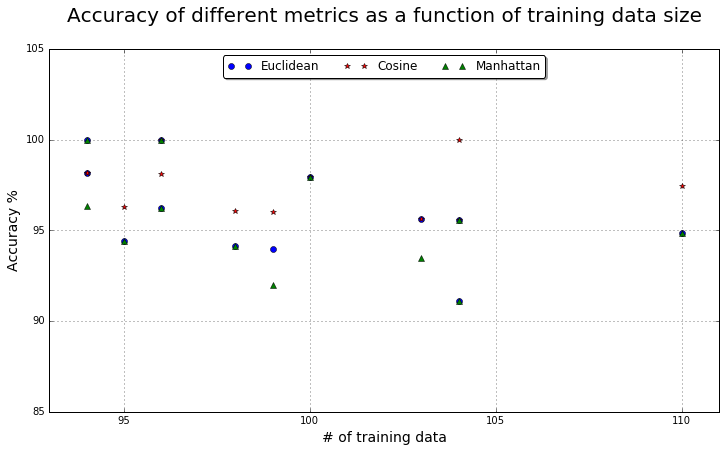

In [10]:
plt.figure(figsize=[12,6.5])
plt.plot(x,y1,'bo',label='Euclidean')
plt.plot(x,y2,'r*',label='Cosine')
plt.plot(x,y3,'g^',label='Manhattan')
plt.axis([min(x)-1,max(x) + 1,85,105])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),fancybox=True, shadow=True, ncol=5)
plt.title('Accuracy of different metrics as a function of training data size\n',fontsize = 20)
plt.xlabel('# of training data',fontsize=14)
plt.ylabel('Accuracy %',fontsize=14)
plt.grid()
plt.show()

### Conclusion 
Based on multiple runs holding the number of similar neighbors $k = 3$ and the split percentage $\alpha = 0.67$, the accuracy seems to be above 90% for the three different metrics. However, it seems that the Manhattan distance seems to have the lowest accuracy of the model. We should also consider testing the effects of changing the values of $k$ and $\alpha$ on the accuracy of the model. Doing so, we can better determine the optimal choice of parameters and metrics.

In [11]:
import numpy as np 
import pandas as pd

In [12]:
y1 = np.array(y1,dtype=float)
y2 = np.array(y2,dtype=float)
y3 = np.array(y3,dtype=float)

In [13]:
df = pd.DataFrame({'Euclidean': y1,'Cosine': y2, 'Manhattan': y3},\
                  index=range(1,len(y1)+1))
df

,Cosine,Euclidean,Manhattan
1,96.000000,94.000000,92.000000
2,96.296296,94.444444,94.444444
3,100.000000,95.555556,95.555556
4,100.000000,96.226415,96.226415
5,95.652174,95.652174,93.478261
6,98.113208,100.000000,100.000000
7,95.555556,91.111111,91.111111
8,97.435897,94.871795,94.871795
9,97.959184,97.959184,97.959184
10,96.078431,94.117647,94.117647
